Read & clean up data

In [1]:
import pandas

X = pandas.read_csv('./data.csv')
y = X['Activity']
X.drop('Activity', inplace=True, axis=1)

Split data into test and train sets

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [3]:
import math

def _sigmoid(x):
    return 1 / (1 + math.exp(-x))

def _log_loss(clf, X, y):
#     train model
    res = []
#   get prediction quality on each iteration
    for y_pred in clf.staged_decision_function(X):
        sigmoid_arr = [_sigmoid(y) for y in y_pred]
#         calc log loss for true and predicted values
        ll_rate = log_loss(y, sigmoid_arr)
        res.append(ll_rate)
    return res

In [10]:
import matplotlib.pyplot as plt

def _print_plot(plt, test_loss, train_loss):
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])

Train gradient boosting and find number of estimators with minimum log loss

Log loss minimum: 0.531094637596885
Log loss minimum at iteration: 36


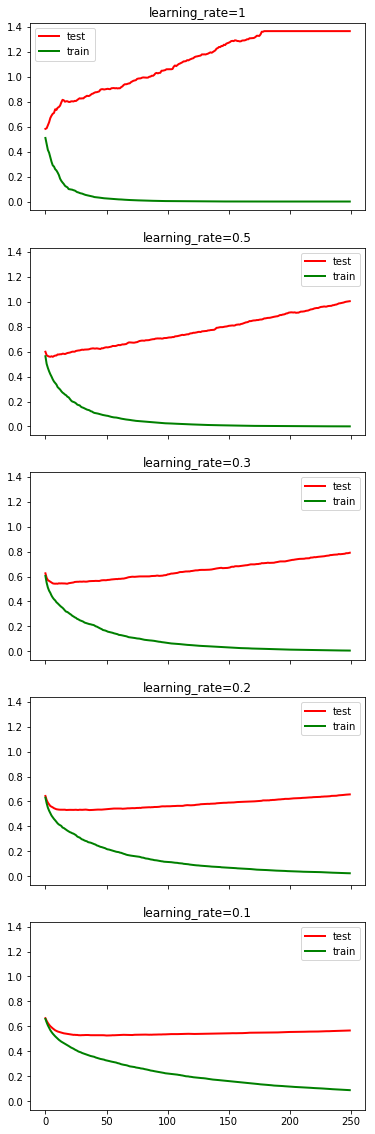

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

learning_rate = [1, 0.5, 0.3, 0.2, 0.1]

min_log_loss = 10000000
min_log_loss_idx = 0

%matplotlib inline
fig, axs = plt.subplots(len(learning_rate), 1, sharex=True, sharey=True, figsize=(6, 20))
idx = 0

for lr in learning_rate:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate=lr)
    clf.fit(X_train, y_train)    
    
    plt = axs[idx]
    plt.set_title('learning_rate=' + str(lr))
    idx = idx + 1
    
    log_loss_train_set = _log_loss(clf, X_train, y_train)

    log_loss_test_set = _log_loss(clf, X_test, y_test)
    
    _print_plot(plt, log_loss_test_set, log_loss_train_set)

#     find min log loss and iteration
    if lr == 0.2:
        for i, ll in enumerate(log_loss_test_set):
            if ll < min_log_loss:
                min_log_loss = ll
                min_log_loss_idx = i

print("Log loss minimum:", min_log_loss)
print("Log loss minimum at iteration:", min_log_loss_idx)

Compare log loss for random forest for the min number of estimators as for gradient boosting:

In [12]:
from sklearn.ensemble import RandomForestClassifier

num = min_log_loss_idx
clf = RandomForestClassifier(n_estimators=min_log_loss_idx, random_state=241)
clf.fit(X_train, y_train)
log_loss_rf = log_loss(y_test, clf.predict_proba(X_test))
print("log loss for random forest:", log_loss_rf)

log loss for random forest: 0.5413812861804069


In [13]:
print("Random forest for estimators", num, 'is', 'better' if log_loss_rf < min_log_loss else 'worse')

Random forest for estimators 36 is worse


In [14]:
num = min_log_loss_idx + 100
clf = RandomForestClassifier(n_estimators=num, random_state=241)
clf.fit(X_train, y_train)
log_loss_rf = log_loss(y_test, clf.predict_proba(X_test))
print("Random forest for estimators", num, 'is', 'better' if log_loss_rf < min_log_loss else 'worse')

Random forest for estimators 136 is better
